In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import os
import seaborn as sns
import warnings

In [3]:
data=pd.read_csv('bj_luohu.csv',encoding='utf-8')
data.head()

,id,name,birthday,company,score
0,1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
1,2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
2,3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
3,4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
4,5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79


In [4]:
data.columns

Index(['id', 'name', 'birthday', 'company', 'score'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 5 columns):
id          6019 non-null int64
name        6019 non-null object
birthday    6019 non-null object
company     6019 non-null object
score       6019 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 235.2+ KB


In [7]:
type(data.birthday)

pandas.core.series.Series

In [10]:
data.birthday=data.birthday.apply(lambda x:x[:4])
data.birthday=data.birthday.astype("int")

In [15]:
data['age']=data.birthday.apply(lambda x:2020-x)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 6 columns):
id          6019 non-null int64
name        6019 non-null object
birthday    6019 non-null int32
company     6019 non-null object
score       6019 non-null float64
age         6019 non-null int64
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 258.7+ KB


In [28]:
data.head()

,id,name,birthday,company,score,age
0,1,杨效丰,1972,北京利德华福电气技术有限公司,122.59,48
1,2,纪丰伟,1974,北京航天数据股份有限公司,121.25,46
2,3,王永,1974,品牌联盟(北京)咨询股份公司,118.96,46
3,4,杨静,1975,中科专利商标代理有限责任公司,118.21,45
4,5,张凯江,1974,北京阿里巴巴云计算技术有限公司,117.79,46


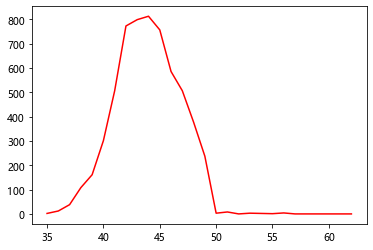

In [52]:
data2=data.groupby("age")['id'].count()
plt.plot(data2,color='red')

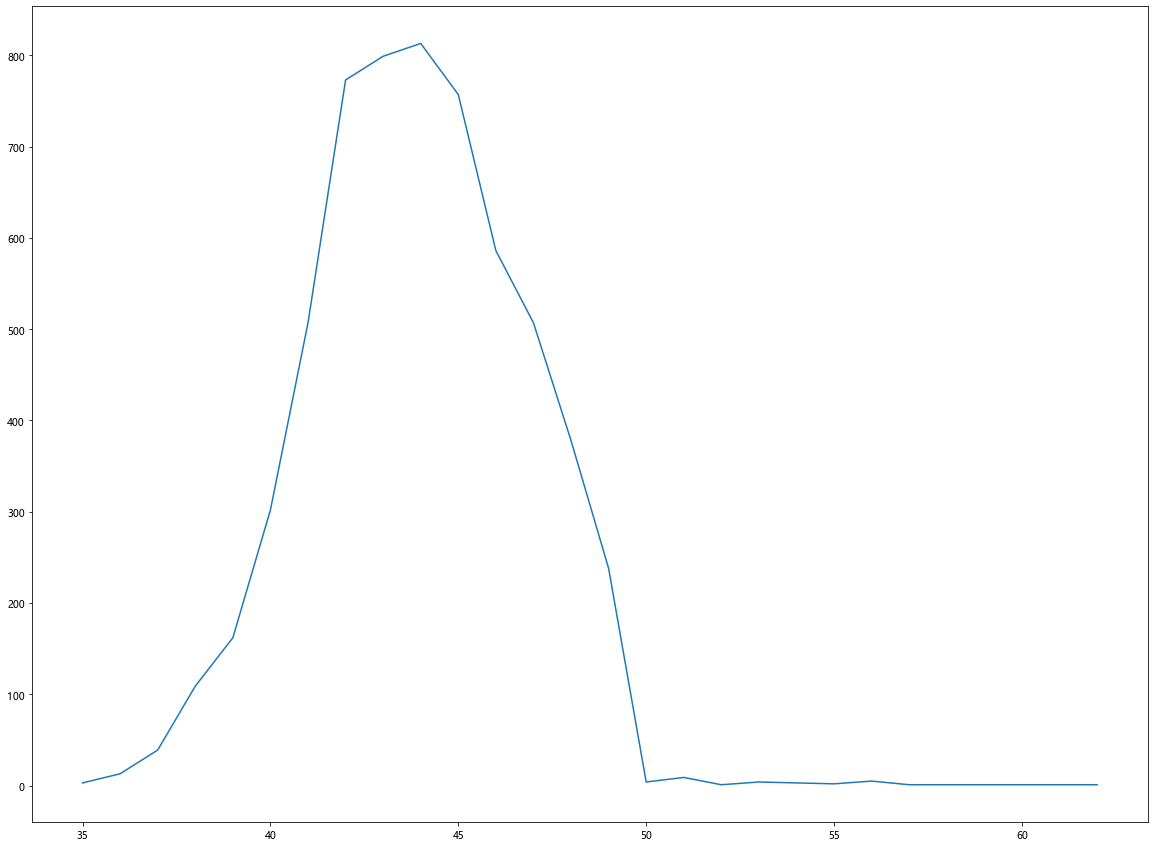

In [58]:
plt.figure(figsize=(20,15))
plt.colorbar='red'
plt.plot(data2)

In [64]:
cut_bin=np.arange(90,130,5)
cut_bin

array([ 90,  95, 100, 105, 110, 115, 120, 125])

In [70]:
cut2=[ 90,  95, 100, 105, 110, 115, 120, 125]

ValueError: Grouper and axis must be same length

In [71]:
data3=pd.cut(data['score'],cut_bin)

In [94]:
data4=data['score'].groupby(data3).count()
data2

age
35      3
36     13
37     39
38    109
39    162
40    302
41    507
42    773
43    799
44    813
45    757
46    586
47    507
48    378
49    238
50      4
51      9
52      1
53      4
54      3
55      2
56      5
57      1
59      1
60      1
61      1
62      1
Name: id, dtype: int64

In [102]:
data4.values

array([3344, 1757,  653,  218,   32,   13,    2], dtype=int64)

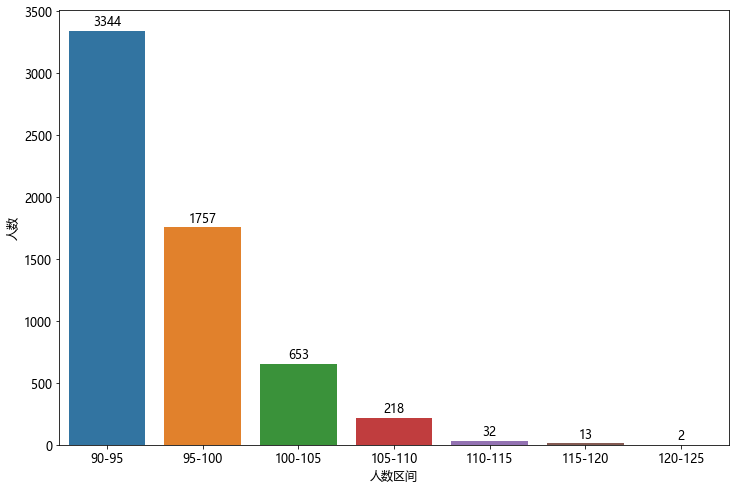

In [104]:
plt.figure(figsize=(12,8))
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size']=12
bin_count=[1,2,3,4,5,6,7]
x_name=['90-95','95-100','100-105','105-110','110-115','115-120','120-125']
sns.barplot(x_name,data4.values)
plt.xlabel('人数区间')
plt.ylabel('人数')

for x,y in zip(range(7),data4):
    plt.text(x,y+20,y,ha='center',va='bottom')
plt.show()

In [114]:
b=list(set(data.company))
len(b)

3430

In [118]:
conpany_data=data.groupby("company",as_index=False).count()[['company','name']]
conpany_data.rename(columns={'name':'numbers'},inplace=True)

In [137]:
data5=conpany_data.head(20)


,company,numbers
0,ABB（中国）有限公司,8


<BarContainer object of 20 artists>

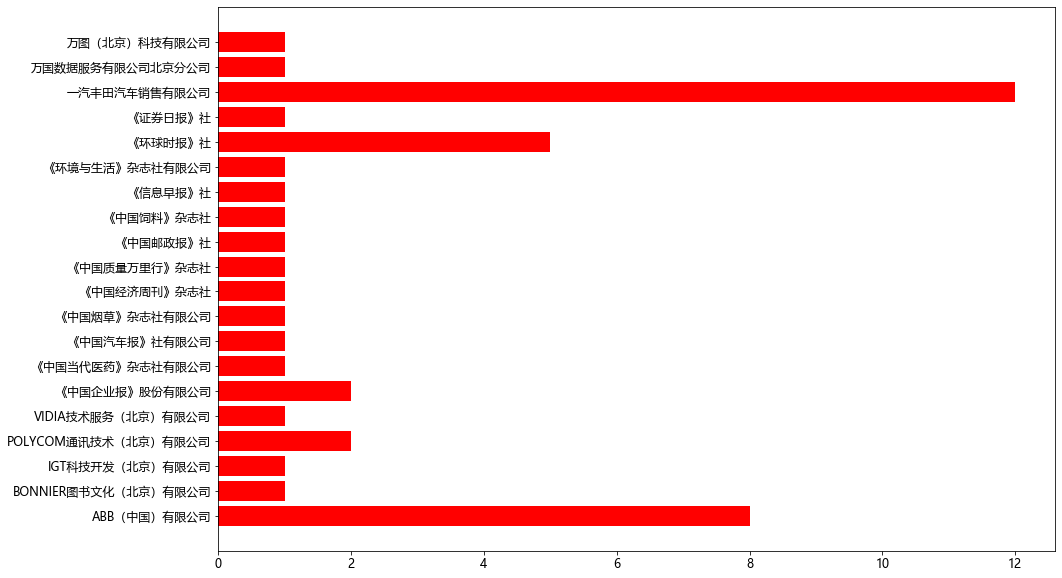

In [148]:
plt.figure(figsize=(15,10))
x_a=data5["company"]
y_b=data5["numbers"]
plt.barh(y=x_a,width=y_b,color="red")

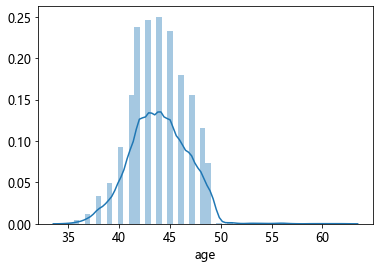

In [150]:
sns.distplot(data['age'])